# <center>Volatility Curve Construction in FX market<center>

## <p style="text-align: right;">Yuqian Li</p>

## <span style="color:blue">Task:</span>

In this project, I focus on constructing the volatility curve in FX market.

Q0: Given all the parameters, construct the volatility curve using SABR model.

Q1: Given the quotes: ATM Vol, $25d$ Risk Reversal, and $25d$ Market Strangle for multiple tenors, construct the volatility curve using $SABR$ model.

Q2-Q3: Extensions from Q1.

Q4: Use the event-weighting scheme to take into account weekend effects. Use the ATM-forward volatilities in Q3 to construct implied volatilities for every day (including weekend days) out to the $6$-month maturity point.

## <span style="color:blue">Reference:</span>

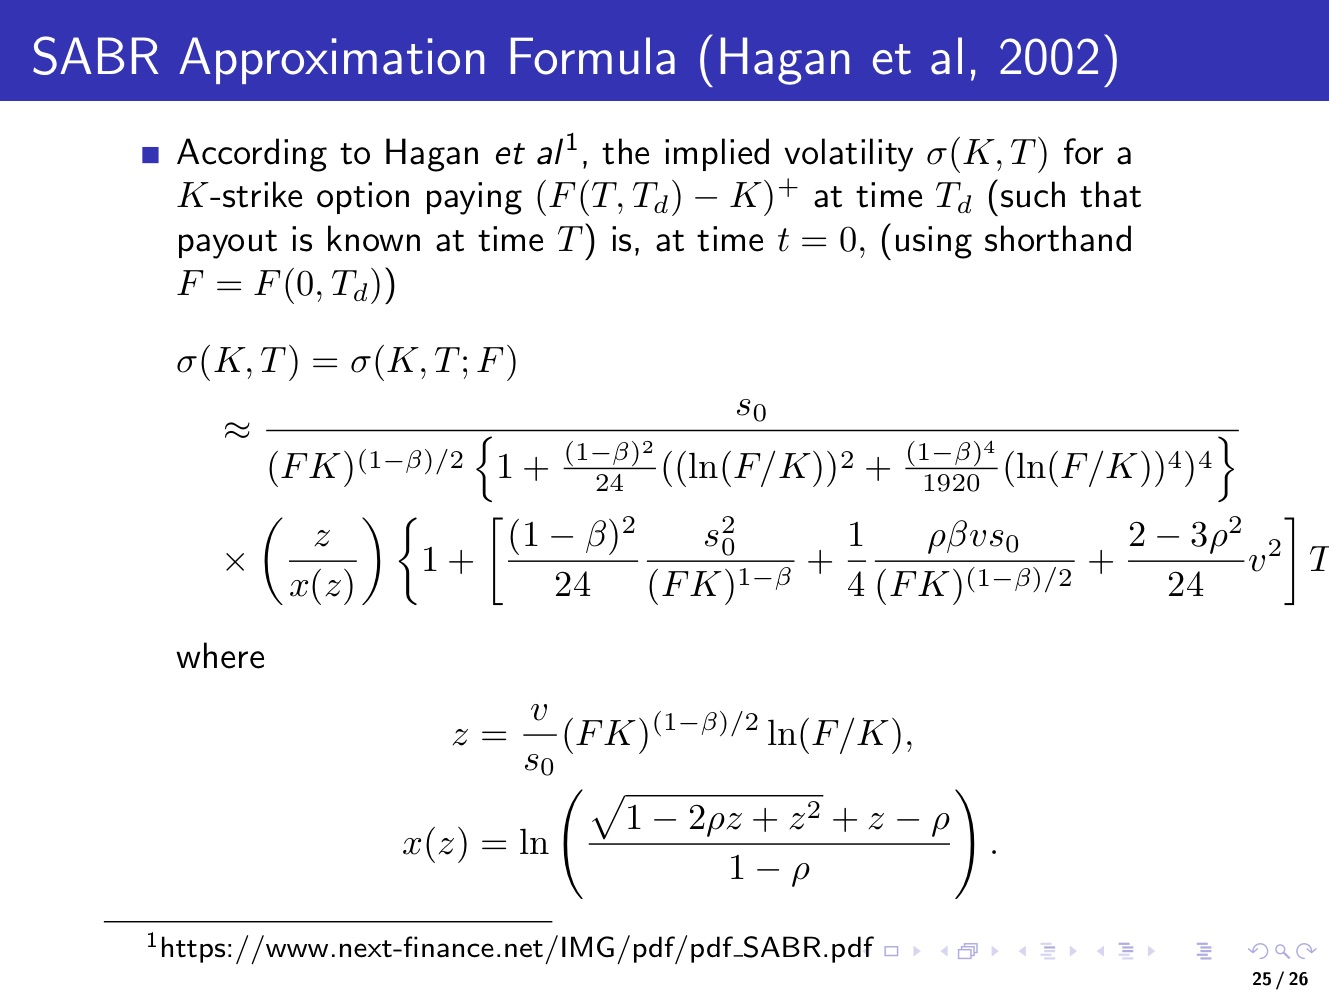

In [2]:
from IPython.display import Image
Image("SABR.jpg")

### <span style="color:blue">Q0: As warm-up, implement the SABR formula for implied volatility and replicate the graph in the below screenshot.</span>

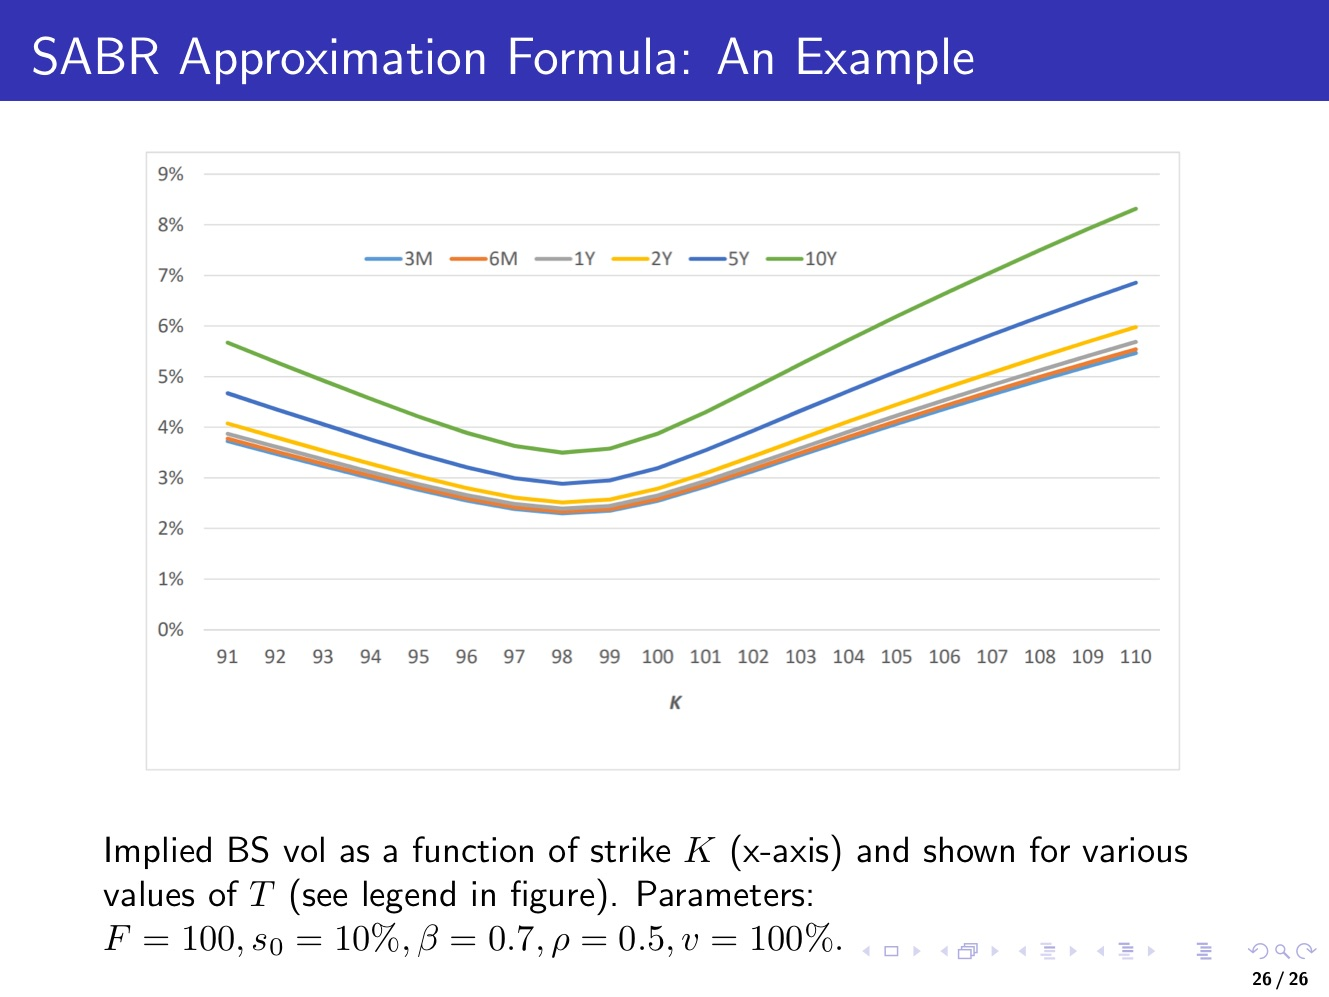

In [1]:
Image("1.jpg")

In [24]:
def SABR(F,s0,beta,rho,v,K,T):
    import numpy as np
    z = v/s0*(F*K)**((1-beta)/2)*np.log(F/K)
    x = np.log((np.sqrt(1-2*rho*z+z**2)+z-rho)/(1-rho))
    part1 = s0/(F*K)**((1-beta)/2)/(1+(1-beta)**2/24*((np.log(F/K))**2+(1-beta)**4/1920*(np.log(F/K))**4)**4)
    part2 = z/x*(1+((1-beta)**2/24*s0**2/(F*K)**(1-beta)
                    +1/4*rho*beta*v*s0/(F*K)**((1-beta)/2)+(2-3*rho**2)*v**2/24)*T)
    sigma = part1 * part2 
    return sigma

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

F = 100
s0 = 0.1
beta = 0.7
rho = 0.5
v = 1
T_values = [0.25, 0.5, 1, 2, 5, 10]
T_labels = ['3M','6M','1Y','2Y','5Y','10Y']
K_values = np.linspace(90, 110, 1000)

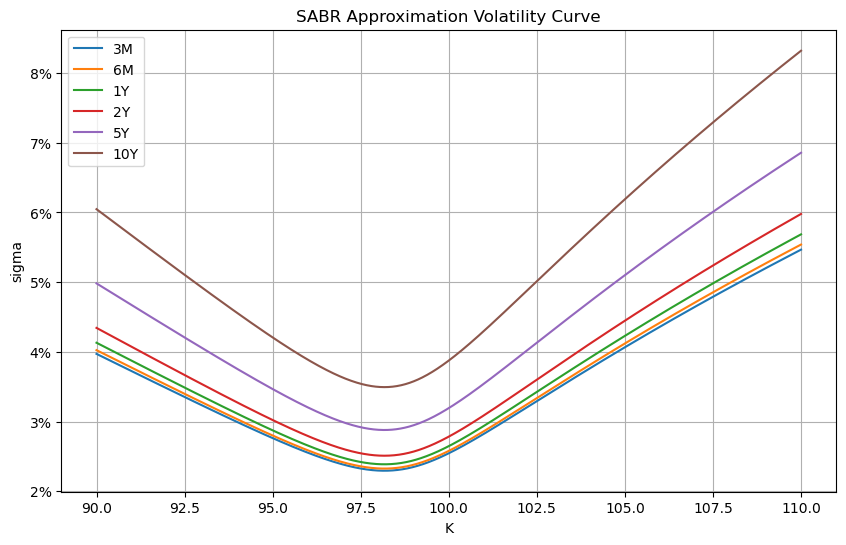

In [9]:
plt.figure(figsize=(10, 6))
for i in range(len(T_values)):
    T = T_values[i]
    label = T_labels[i]
    SABR_values = [SABR(F, s0, beta, rho, v, K, T) for K in K_values]
    plt.plot(K_values, SABR_values, label=f"{label}")

def percentage(x, pos):
    return '{:.0f}%'.format(x * 100)

plt.xlabel("K")
plt.ylabel("sigma")
plt.legend()
plt.grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage))
plt.title("SABR Approximation Volatility Curve")
plt.show()

### <span style="color:blue">Q1: For every maturity in the table, use the SABR model (with correlation $\rho$ parameter set to 0), to construct all 5 strikes involved in the market quotes. For every maturity, list these strikes and their corresponding implied volatilities (make a nice table). In a separate table, list the calibrated SABR parameters for every maturity.</span>

__Note:__
    
1. Because starting from Q1, we are investigating in shorted-dated options. According to Lec 3 notes P2, $K_{ATM}$ means the $K$ that makes $|\Delta_{call}| = |\Delta_{put}|$.

2. I use premium-adjusted delta. The first reason is that I want to be more accurate. The second reason is that the market convention is often premium-adjusted, which is shown on Lec 3 notes P5. So, according to Lec 3 notes P4, the formula of $K_{ATM}$ is:

$$K_{ATM} = F(t,T_d)e^{-\frac{1}{2}\sigma^2(T-t)}$$

3. In order to set up more effective, stable, and smoother volatility smile by SABR, as Professor said and agreed on in class, I also set $\rho$ as a free variable. So we have 4 free variables: $s_0$, $\beta$, $\rho$, $v$ in total.

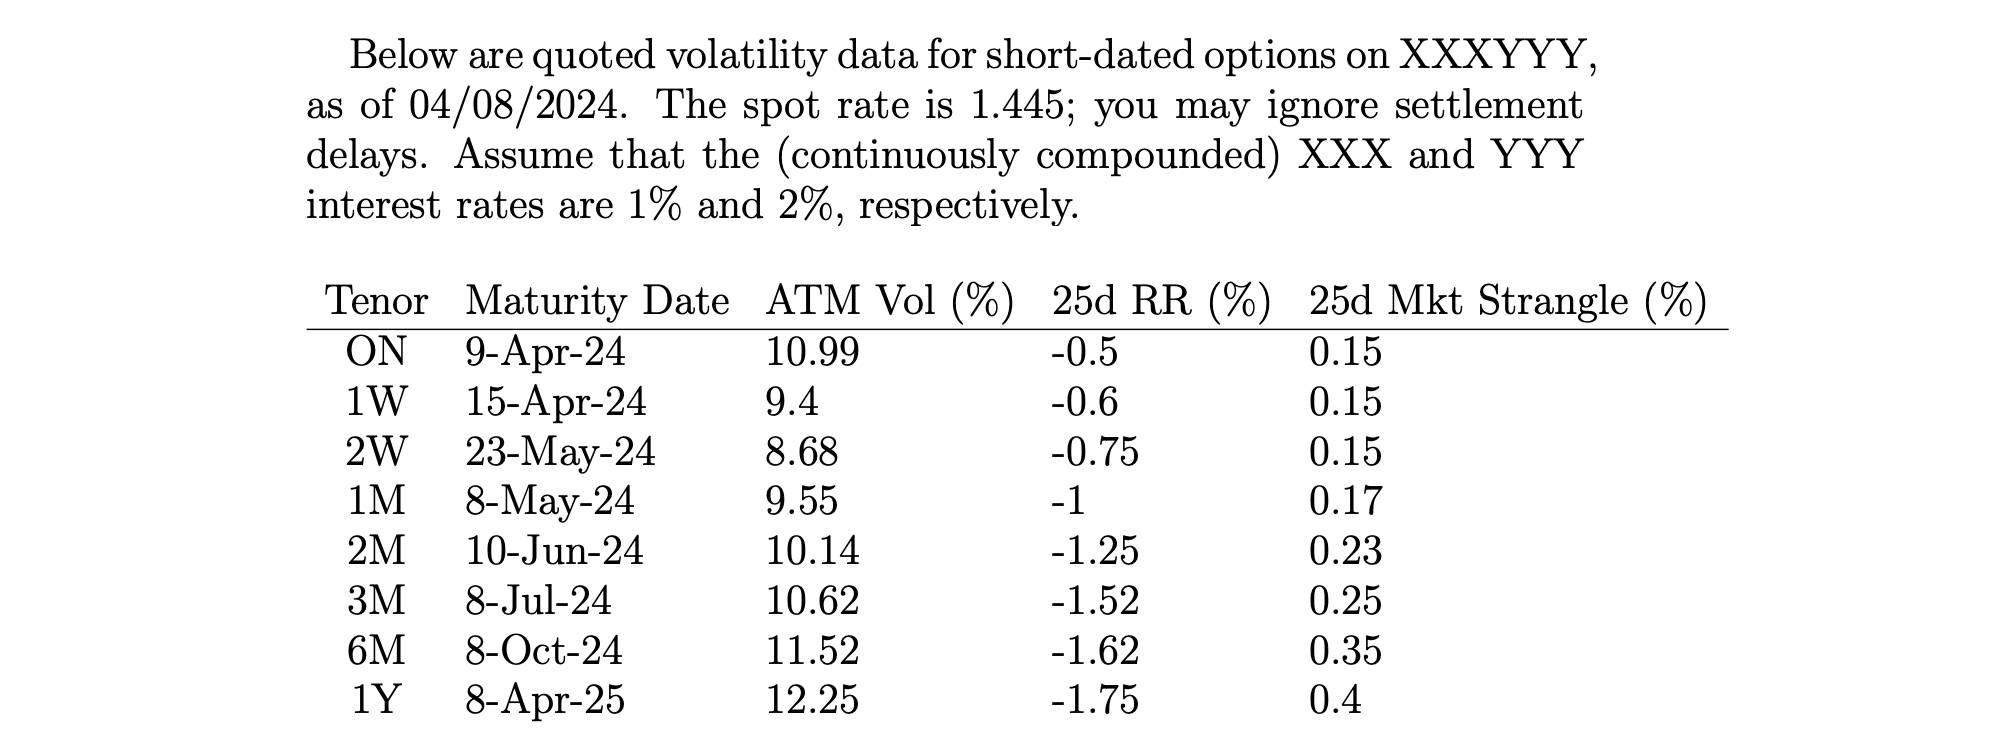

In [11]:
from IPython.display import Image
Image("data0.jpg")

### <span style="color:blue">Part 0: Preparation</span>

In [567]:
def getNaturalDays(date1,date2):
    from datetime import datetime
    date1 = datetime.strptime(date1, '%Y-%m-%d')
    date2 = datetime.strptime(date2, '%Y-%m-%d')
    ans = (date2-date1).days
    return ans

In [568]:
# check
getNaturalDays('2024-04-08','2024-04-09')

1

In [569]:
# known from the problem
X = 1.445
rf = 0.01
rd = 0.02
maturity_arr = ['2024-04-09','2024-04-15','2024-04-23','2024-05-08','2024-06-10','2024-07-08','2024-10-08','2025-04-08']
deltat_arr = [getNaturalDays('2024-04-08',i)/365 for i in maturity_arr]
sigma_ATM_arr = [0.1099,0.094,0.0868,0.0955,0.1014,0.1062,0.1152,0.1225]
RR_arr = [-0.005,-0.006,-0.0075,-0.01,-0.0125,-0.0152,-0.0162,-0.0175]
MS_arr = [0.0015,0.0015,0.0015,0.0017,0.0023,0.0025,0.0035,0.004]

In [570]:
deltat_arr # check

[0.0027397260273972603,
 0.019178082191780823,
 0.0410958904109589,
 0.0821917808219178,
 0.1726027397260274,
 0.2493150684931507,
 0.5013698630136987,
 1.0]

### <span style="color:blue">Part 1: ATM</span>

In [571]:
def P(deltat,r):
    return np.exp(-r*deltat)

In [572]:
def F(deltat):
    F = X*P(deltat,rf)/P(deltat,rd)
    return F

In [573]:
# known # premium-adjusted
def K_ATM(deltat,sigma_ATM):
    K_ATM = F(deltat)*np.exp(-0.5*sigma_ATM**2*deltat) 
    return K_ATM

$K_{ATM}$ can be calculated directly:

In [574]:
# known
K_ATM_arr = [K_ATM(deltat_arr[i],sigma_ATM_arr[i]) for i in range(8)]
K_ATM_arr

[1.4450156812844703,
 1.4451546984994263,
 1.445370178021439,
 1.4456462227613323,
 1.4462124011748771,
 1.4465718701177148,
 1.4474395536275266,
 1.4486124924692616]

### <span style="color:blue">Part 2: Risk Reversal</span>

For later root search (I use `fsolve`), set the intial guess to be $K_{ATM}$.

In [575]:
# Use K_ATM_arr as the intial guess for K_RR and K_MS
initial_guess_K_arr = [[K_ATM_arr[i]]+[K_ATM_arr[i]] for i in range(8)]
initial_guess_K_arr

[[1.4450156812844703, 1.4450156812844703],
 [1.4451546984994263, 1.4451546984994263],
 [1.445370178021439, 1.445370178021439],
 [1.4456462227613323, 1.4456462227613323],
 [1.4462124011748771, 1.4462124011748771],
 [1.4465718701177148, 1.4465718701177148],
 [1.4474395536275266, 1.4474395536275266],
 [1.4486124924692616, 1.4486124924692616]]

In [576]:
from scipy.stats import norm

In [577]:
def d(deltat,K,sigma):
    d1 = (np.log(F(deltat)/K)+0.5*sigma**2*deltat)/sigma/np.sqrt(deltat)
    d2 = (np.log(F(deltat)/K)-0.5*sigma**2*deltat)/sigma/np.sqrt(deltat)
    return (d1,d2)

In [578]:
def PAdelta_call(deltat,K,sigma):
    return P(deltat,rf)*K*norm.cdf(d(deltat,K,sigma)[1])/F(deltat)

In [579]:
def PAdelta_put(deltat,K,sigma):
    return -P(deltat,rf)*K*norm.cdf(-d(deltat,K,sigma)[1])/F(deltat)

In [580]:
def cal_RR(deltat,s0,beta,rho,v,initial_guess_K,x):
    def equation(K):
        K_C = K[0]
        K_P = K[1]
        sigma_K_C = SABR(F(deltat),s0,beta,rho,v,K_C,deltat)
        sigma_K_P = SABR(F(deltat),s0,beta,rho,v,K_P,deltat)
        PAdelta_C = PAdelta_call(deltat,K_C,sigma_K_C)
        PAdelta_P = PAdelta_put(deltat,K_P,sigma_K_P)
        return [PAdelta_C-x,PAdelta_P+x] 
    from scipy.optimize import fsolve
    initial_guess = initial_guess_K
    K_RR = list(fsolve(equation, initial_guess_K))
    K_C = K_RR[0]
    K_P = K_RR[1]
    #values_at_result = equation(K_RR)
    sigma_K_C = SABR(F(deltat),s0,beta,rho,v,K_C,deltat)
    sigma_K_P = SABR(F(deltat),s0,beta,rho,v,K_P,deltat)
    sigma_RR = [sigma_K_C,sigma_K_P]
    cal_RR = sigma_K_C - sigma_K_P
    return K_RR, sigma_RR, cal_RR

In [581]:
# test cal_RR
cal_RR(deltat=deltat_arr[0],s0=0.1,beta=0.7,rho=0,v=1,initial_guess_K=initial_guess_K_arr[0],x=0.25)

([1.4496156596071965, 1.440475583324975],
 [0.08954051193494122, 0.08962548975932645],
 -8.497782438522672e-05)

### <span style="color:blue">Part 3: Market Stangle</span>

In [582]:
# known
sigma_s_arr = list(np.array(sigma_ATM_arr) + np.array(MS_arr))
sigma_s_arr

[0.1114, 0.0955, 0.0883, 0.0972, 0.1037, 0.1087, 0.1187, 0.1265]

In [583]:
# known
def cal_Ks(deltat,sigma_s,initial_guess,x):
    def equation(K):
        K_C = K[0]
        K_P = K[1]
        PAdelta_C = PAdelta_call(deltat,K_C,sigma_s)
        PAdelta_P = PAdelta_put(deltat,K_P,sigma_s)
        return [PAdelta_C-x,PAdelta_P+x] 
    from scipy.optimize import fsolve
    initial_guess = initial_guess
    Ks = list(fsolve(equation, initial_guess))
    return Ks

$K_s^C$ and $K_s^P$ can be calculated directly:

In [584]:
# known
Ks_arr = [cal_Ks(deltat_arr[i],sigma_s_arr[i],initial_guess_K_arr[i],0.25) for i in range(8)]
Ks_arr

[[1.4507353047347094, 1.439369237059554],
 [1.4582318655735325, 1.4324528333467663],
 [1.4631585206701896, 1.428268138080525],
 [1.4736333719353583, 1.419320888576344],
 [1.4901643065347316, 1.406206195311032],
 [1.502577256114719, 1.3968191655998885],
 [1.5367140681784754, 1.3730066186223684],
 [1.5884065978403834, 1.3422291971796796]]

In [585]:
# N does not matter, because it appears on both sides of V_s_call+V_s_put = SIGMA, N can be cancelled out.
N = 1

In [586]:
def Vf_C(deltat,K,sigma):
    Vd_C = P(deltat,rd)*N*(F(deltat)*norm.cdf(d(deltat,K,sigma)[0])-K*norm.cdf(d(deltat,K,sigma)[1]))
    Vf_C = Vd_C/X
    return Vf_C

In [587]:
def Vf_P(deltat,K,sigma):
    Vd_P = P(deltat,rd)*N*(-F(deltat)*norm.cdf(-d(deltat,K,sigma)[0])+K*norm.cdf(-d(deltat,K,sigma)[1]))
    Vf_P = Vd_P/X
    return Vf_P

In [588]:
# known
def SIGMA(deltat,Ks,sigma_s):
    SIGMA = Vf_C(deltat,Ks[0],sigma_s)+Vf_P(deltat,Ks[1],sigma_s)
    return SIGMA

$\Sigma$ can be calculated directly:

In [589]:
# known
# price depends on N, but it does not depend on N when checking V_s_call+V_s_put = SIGMA

SIGMA_arr = [SIGMA(deltat_arr[i],Ks_arr[i],sigma_s_arr[i]) for i in range(8)]
SIGMA_arr

[0.0017394386628038344,
 0.0039455210329901284,
 0.005340649931658185,
 0.008315506989446962,
 0.012861062793397757,
 0.016207860005183747,
 0.025128046186044986,
 0.03791062575947504]

In [590]:
def cal_MS(deltat,Ks,s0,beta,rho,v):
    sigma_Ks_C = SABR(F(deltat),s0,beta,rho,v,Ks[0],deltat)
    sigma_Ks_P = SABR(F(deltat),s0,beta,rho,v,Ks[1],deltat)
    Vf_s_C = Vf_C(deltat,Ks[0],sigma_Ks_C)
    Vf_s_P = Vf_P(deltat,Ks[1],sigma_Ks_P)
    return Vf_s_C+Vf_s_P

In [591]:
# test cal_MS
cal_MS(deltat_arr[0],Ks=Ks_arr[0],s0=0.1,beta=0.7,rho=0,v=1)

0.001052645030209636

### <span style="color:blue">Part 4: Smile Construction</span>

__Find $s_0$, $\beta$, $\rho$, $v$ so that the following 3 conditions are satisfied.__

(1) SABR(F(deltat),s0,beta,rho,v,K_ATM,deltat) = $\sigma_{ATM}$

(2) cal_RR(deltat,s0,beta,rho,v,x)[2] = $RR$

(3) cal_MS(deltat,s0,beta,rho,v) = $\Sigma$

__Besides, $s_0$, $\beta$, $\rho$, $v$ need to be in certain scopes:__

$s_0 > 0$, $\beta \in (0,1)$, $\rho \in (-1,1)$, $v \ge 0$

### <span style="color:blue">Method 1: fsolve (Do not use)</span>

__Reason:__

There are 3 variables and 3 equations. Theoretically, we can use fsolve to solve the equations, and the solutions are the params $s_0$,$\beta$,$v$ that we are looking for.

__Drawbacks:__

(1) fsolve largely depends on the intial guess. If they are not close enough, f_solve cannot converge and return to a effective solution.

(2) fsolve does not contain the function of bounds. In other words, we cannot guarantee the solutions fall in the scopes where they need to fall, as the following shows.

(3) fsolve requests the number of equations = the number of free variables, so we must fix $\rho$ here.

In [592]:
def cal_1(deltat,K_ATM,sigma_ATM,RR,Ks,SIGMA,initial_guess_K,x):
    def equation_final(params):
        s0,beta,v = params
        rho = 0
        f1 = SABR(F(deltat),s0,beta,rho,v,K_ATM,deltat)-sigma_ATM
        f2 = cal_RR(deltat,s0,beta,rho,v,initial_guess_K,x)[2]-RR
        f3 = cal_MS(deltat,Ks,s0,beta,rho,v)-SIGMA
        return [f1, f2, f3]
    initial_guess_params = [1,0.5,1]
    res_params = fsolve(equation_final, initial_guess_params)
    values_at_result = equation_final(res_params)
    return res_params,values_at_result

In [354]:
# test cal_1
cal_1(deltat_arr[0],K_ATM_arr[0],sigma_ATM_arr[0],RR_arr[0],Ks_arr[0],SIGMA_arr[0],initial_guess_K_arr[0],0.25)

(array([  7.2123106 , -10.40449435,  -7.90693325]),
 [-4.621303340002214e-14, 2.3158558404290375e-16, -9.603862843876598e-16])

### <span style="color:blue">Method 2: minimize (Do not use)</span>

__Reasons:__

(1) We can convert the 3-variable, 3-equation problem into MSE minimizing problem with bounds.

(2) Minimize function has the function of bounds.

(3) It is ok if we set $\rho$ free. 4 free variables will lead to better optimization result.

__Drawbacks:__

(1) By optimize.minimize, we can only minimize the sum of 3 squared errors, rather than minimizing each of them.

(2) optimize.minimize largely depends on initial guess.

In [377]:
def cal_2(deltat,K_ATM,sigma_ATM,RR,Ks,SIGMA,initial_guess_K,x):
    from scipy.optimize import minimize
    def mini(params):
        s0,beta,rho,v = params
        f1 = SABR(F(deltat),s0,beta,rho,v,K_ATM,deltat)/sigma_ATM -1
        f2 = cal_RR(deltat,s0,beta,rho,v,initial_guess_K,x)[2]/RR -1
        f3 = cal_MS(deltat,Ks,s0,beta,rho,v)/SIGMA -1
        return f1**2 + f2**2 + f3**2
    initial_guess_params = [0.1,0.7,0,2]
    bounds = [(0, 100), (0, 1), (-1,1), (0, 100)]
    result = minimize(mini, initial_guess_params, bounds=bounds)
    return result.x, result.fun

In [378]:
# test cal_2
cal_2(deltat_arr[0],K_ATM_arr[0],sigma_ATM_arr[0],RR_arr[0],Ks_arr[0],SIGMA_arr[0],initial_guess_K_arr[0],0.25)

(array([ 0.12577714,  0.6615981 , -0.61637796,  2.00596275]),
 0.0001443953429400695)

### <span style="color:blue">Method 3: least_squares (Use this)</span>

__Note:__

In order to let the model be smoother, more stable, and less dependent on initial guess, I set $\rho$ to be the 4th free variable.

__Reasons:__

(1) least_squares does not depend on initial guess.

(2) least_squares has the function of bounds.

(3) We optimize by making squares of differences least, i.e. min MSE.
 
(4) It is ok if we set $\rho$ free. 4 free variables will lead to better optimization result.

In [593]:
def cal_3(deltat,K_ATM,sigma_ATM,RR,Ks,SIGMA,initial_guess_K,x):
    from scipy.optimize import least_squares
    def obj(params):
        s0,beta,rho,v = params
        f1 = SABR(F(deltat),s0,beta,rho,v,K_ATM,deltat)-sigma_ATM
        f2 = cal_RR(deltat,s0,beta,rho,v,initial_guess_K,x)[2]-RR
        f3 = cal_MS(deltat,Ks,s0,beta,rho,v)-SIGMA
        '''
        # relative difference works more poorly than difference, I mean the method above.
        f1 = SABR(F(deltat),s0,beta,rho,v,K_ATM,deltat)/sigma_ATM -1
        f2 = cal_RR(deltat,s0,beta,rho,v,initial_guess_K,x)[2]/RR -1
        f3 = cal_MS(deltat,Ks,s0,beta,rho,v)/SIGMA -1
        '''
        return [f1,f2,f3]
    initial_guess_params = [0.1,0.7,0,2]
    bounds = ([0, 0, -1, 0],[float('inf'),1,1,float('inf')])
    result = least_squares(obj, initial_guess_params, bounds=bounds)
    return result.x, result.fun

In [594]:
# test cal_3
cal_3(deltat_arr[0],K_ATM_arr[0],sigma_ATM_arr[0],RR_arr[0],Ks_arr[0],SIGMA_arr[0],initial_guess_K_arr[0],0.25)

(array([ 0.12155807,  0.68651935, -0.15052888,  8.15130411]),
 array([5.00633461e-08, 1.86632334e-07, 4.65497375e-07]))

### <span style="color:blue">Part 5: Result and Conclusion</span>

__The results below are pretty satisfying, because tiny errors:__

In [595]:
smile_params_arr = [cal_3(deltat_arr[i],K_ATM_arr[i],sigma_ATM_arr[i],RR_arr[i],Ks_arr[i],SIGMA_arr[i],initial_guess_K_arr[i],0.25) for i in range(8)]
smile_params_arr

[(array([ 0.12155807,  0.68651935, -0.15052888,  8.15130411]),
  array([5.00633461e-08, 1.86632334e-07, 4.65497375e-07])),
 (array([ 0.1034132 ,  0.69459569, -0.18989187,  3.36061379]),
  array([4.99596084e-08, 1.78603750e-07, 2.76092612e-08])),
 (array([ 0.09918658,  0.58737354, -0.23811382,  2.43407332]),
  array([-6.11676251e-10,  1.59699211e-09,  1.31860346e-08])),
 (array([ 0.10508095,  0.68689173, -0.27605267,  1.80119102]),
  array([-1.24655541e-07,  2.40299741e-07,  1.06094984e-06])),
 (array([ 0.11676946,  0.54752849, -0.26925468,  1.40915099]),
  array([ 2.36763297e-07,  8.91432422e-08, -7.83292515e-07])),
 (array([ 0.12516141,  0.4795724 , -0.29014725,  1.22368778]),
  array([ 1.05059147e-06,  1.57915686e-07, -3.21513182e-06])),
 (array([ 0.16069697,  0.00125063, -0.17444406,  0.94919915]),
  array([ 4.47998281e-07,  1.75691336e-08, -1.02406102e-06])),
 (array([ 0.16334122,  0.113149  , -0.1303529 ,  0.71622879]),
  array([ 2.9108938e-07,  1.3429543e-08, -4.7718539e-07]))]

__The following table shows the best params for each of the maturity.__

In [596]:
import pandas as pd
maturity_labels = ['ON','1W','2W','1M','2M','3M','6M','1Y']
df_params = pd.DataFrame(smile_params_arr, columns=['params', 'MSE'])
df_params[['s0', 'beta', 'rho', 'v']] = pd.DataFrame(df_params['params'].tolist(), index=df_params.index)
df_params.index = maturity_labels
df_params.drop('params', axis=1, inplace=True)
df_params.drop('MSE', axis=1, inplace=True)
df_params

,s0,beta,rho,v
ON,0.121558,0.686519,-0.150529,8.151304
1W,0.103413,0.694596,-0.189892,3.360614
2W,0.099187,0.587374,-0.238114,2.434073
1M,0.105081,0.686892,-0.276053,1.801191
2M,0.116769,0.547528,-0.269255,1.409151
3M,0.125161,0.479572,-0.290147,1.223688
6M,0.160697,0.001251,-0.174444,0.949199
1Y,0.163341,0.113149,-0.130353,0.716229


__The following shows multiple $K$ and corresponding $\sigma$ under the SABR model with best params for each of the maturity.__

In [597]:
# known: K_ATM_arr
smile_sigma_ATM_arr = [SABR(F=F(deltat_arr[i]),s0=smile_params_arr[i][0][0],beta=smile_params_arr[i][0][1],
                            rho=smile_params_arr[i][0][2],v=smile_params_arr[i][0][3],K=K_ATM_arr[i],
                            T=deltat_arr[i]) for i in range(8)]

In [598]:
# RR
smile_RR = [cal_RR(deltat=deltat_arr[i],s0=smile_params_arr[i][0][0],beta=smile_params_arr[i][0][1],
                   rho=smile_params_arr[i][0][2],v=smile_params_arr[i][0][3],initial_guess_K=initial_guess_K_arr[i],x=0.25) 
            for i in range(8)]
smile_K_RR_C_arr = [smile_RR[i][0][0] for i in range(8)]
smile_K_RR_P_arr = [smile_RR[i][0][1] for i in range(8)]
smile_sigma_RR_C_arr = [SABR(F=F(deltat_arr[i]),s0=smile_params_arr[i][0][0],beta=smile_params_arr[i][0][1],
                         rho=smile_params_arr[i][0][2],v=smile_params_arr[i][0][3],K=smile_K_RR_C_arr[i],
                         T=deltat_arr[i]) for i in range(8)]
smile_sigma_RR_P_arr = [SABR(F=F(deltat_arr[i]),s0=smile_params_arr[i][0][0],beta=smile_params_arr[i][0][1],
                         rho=smile_params_arr[i][0][2],v=smile_params_arr[i][0][3],K=smile_K_RR_P_arr[i],
                         T=deltat_arr[i]) for i in range(8)]

In [599]:
# MS
# known: Ks_arr
smile_Ks_C_arr = [Ks_arr[i][0] for i in range(8)]
smile_Ks_P_arr = [Ks_arr[i][1] for i in range(8)]
smile_sigma_Ks_C_arr = [SABR(F=F(deltat_arr[i]),s0=smile_params_arr[i][0][0],beta=smile_params_arr[i][0][1],
                         rho=smile_params_arr[i][0][2],v=smile_params_arr[i][0][3],K=smile_Ks_C_arr[i],
                         T=deltat_arr[i]) for i in range(8)]
smile_sigma_Ks_P_arr = [SABR(F=F(deltat_arr[i]),s0=smile_params_arr[i][0][0],beta=smile_params_arr[i][0][1],
                         rho=smile_params_arr[i][0][2],v=smile_params_arr[i][0][3],K=smile_Ks_P_arr[i],
                         T=deltat_arr[i]) for i in range(8)]

In [664]:
df_smile = pd.DataFrame(index=maturity_labels)
df_smile['$K_{ATM}$'] = K_ATM_arr
df_smile['$\sigma_{ATM}$'] = sigma_ATM_arr
df_smile['$_{Imp}\sigma_{_{ATM}}$'] = smile_sigma_ATM_arr
df_smile['$K_{RR}^C$'] = smile_K_RR_C_arr
df_smile['$_{Imp}\sigma_{RR}^C$'] = smile_sigma_RR_C_arr
df_smile['$K_{RR}^P$'] = smile_K_RR_P_arr
df_smile['$_{Imp}\sigma_{RR}^P$'] = smile_sigma_RR_P_arr
df_smile['$K_s^C$'] = smile_Ks_C_arr
df_smile['$_{Imp}\sigma_s^C$'] = smile_sigma_Ks_C_arr
df_smile['$K_s^P$'] = smile_Ks_P_arr
df_smile['$_{Imp}\sigma_s^P$'] = smile_sigma_Ks_P_arr
df_smile

,$K_{ATM}$,$\sigma_{ATM}$,$_{Imp}\sigma_{_{ATM}}$,$K_{RR}^C$,$_{Imp}\sigma_{RR}^C$,$K_{RR}^P$,$_{Imp}\sigma_{RR}^P$,$K_s^C$,$_{Imp}\sigma_s^C$,$K_s^P$,$_{Imp}\sigma_s^P$
ON,1.445016,0.1099,0.109900,1.450610,0.108960,1.439239,0.113960,1.450735,0.108974,1.439369,0.113838
1W,1.445155,0.0940,0.094000,1.457834,0.092581,1.432041,0.098580,1.458232,0.092588,1.432453,0.098397
2W,1.445370,0.0868,0.086800,1.462435,0.084685,1.427511,0.092185,1.463159,0.084669,1.428268,0.091905
1M,1.445646,0.0955,0.095500,1.472274,0.092432,1.417891,0.102432,1.473633,0.092385,1.419321,0.102004
2M,1.446212,0.1014,0.101400,1.487697,0.097793,1.403627,0.110293,1.490164,0.097759,1.406206,0.109643
3M,1.446572,0.1062,0.106201,1.498978,0.101586,1.393054,0.116786,1.502577,0.101512,1.396819,0.115899
6M,1.447440,0.1152,0.115200,1.531221,0.111196,1.367403,0.127396,1.536714,0.111252,1.373007,0.126329
1Y,1.448612,0.1225,0.122500,1.579934,0.118519,1.333866,0.136019,1.588407,0.118653,1.342229,0.134763


__Plot the Volatility smiles under SABR model that we have set up, for each of the maturity.__

__Also mark the 5 special $(K,\sigma)$ pairs on the graph.__

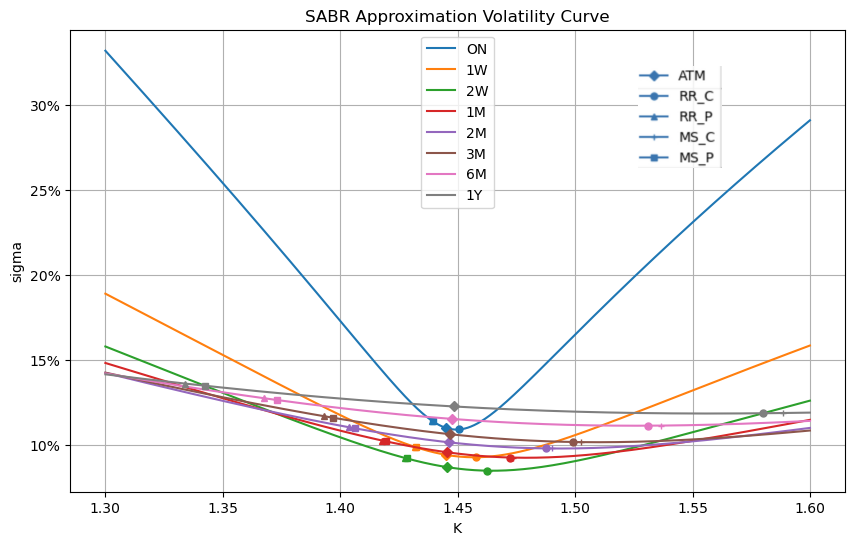

In [601]:
import matplotlib.image as mpimg

img = mpimg.imread('marker.jpg')

K_values_Q1 = np.linspace(1.3, 1.6, 1000)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(8):
    label = maturity_labels[i]
    SABR_values = [SABR(F=F(deltat_arr[i]),s0=smile_params_arr[i][0][0],beta=smile_params_arr[i][0][1],
                         rho=smile_params_arr[i][0][2],v=smile_params_arr[i][0][3],K=K,T=deltat_arr[i]) 
                   for K in K_values_Q1]
    ax.plot(K_values_Q1, SABR_values, label=f"{label}",color=colors[i])
    ax.plot(K_ATM_arr[i], smile_sigma_ATM_arr[i], marker='D',markersize=5, color=colors[i])
    ax.plot(smile_K_RR_C_arr[i], smile_sigma_RR_C_arr[i], marker='o', markersize=5, color=colors[i])
    ax.plot(smile_K_RR_P_arr[i], smile_sigma_RR_P_arr[i], marker='^', markersize=5, color=colors[i])
    ax.plot(smile_Ks_C_arr[i], smile_sigma_Ks_C_arr[i], marker='+', markersize=5, color=colors[i])
    ax.plot(smile_Ks_P_arr[i], smile_sigma_Ks_P_arr[i], marker='s', markersize=5, color=colors[i])

def percentage(x, pos):
    return '{:.0f}%'.format(x * 100)

plt.xlabel("K")
plt.ylabel("sigma")
plt.legend()
plt.grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage))
plt.title("SABR Approximation Volatility Curve")

axins = fig.add_axes([0.65, 0.65, 0.17, 0.17]) 
axins.imshow(img) 
axins.axis('off')

plt.show()

__Findings:__
    
1. The shorter the maturity is, the steeper the volatility smile is.

2. $K^P \le K_{ATM} \le K^C$.

3. The shorter the maturity is, the closer each $K$s are located to the middle.

### <span style="color:blue">Q2: For the 3-month (3M) maturity, work out the strikes that correspond to deltas of 10% and 90%. On this range of strikes, draw a smooth graph of the function $\sigma(K)$.</span>

In [602]:
params_Q2 = smile_params_arr[5][0]
params_Q2

array([ 0.12516141,  0.4795724 , -0.29014725,  1.22368778])

$K_{ATM}$ is fixed.

In [603]:
# fixed: K_ATM_arr[5]
SABR_sigma_K_ATM = SABR(F=F(deltat_arr[5]),s0=params_Q2[0],beta=params_Q2[1],
                        rho=params_Q2[2],v=params_Q2[3],K=K_ATM_arr[5],T=deltat_arr[5])

Under $\Delta = 0.1$,

In [604]:
# delta level = 0.1
cal_RR_10 = cal_RR(deltat=deltat_arr[5],s0=params_Q2[0],beta=params_Q2[1],rho=params_Q2[2],v=params_Q2[3],
                   initial_guess_K=initial_guess_K_arr[5],x=0.1)
K_RR_C_10 = cal_RR_10[0][0]
K_RR_P_10 = cal_RR_10[0][1]

In [605]:
Ks_10 = cal_Ks(deltat_arr[5],sigma_s_arr[5],initial_guess_K_arr[5],x=0.1)
Ks_C_10 = Ks_10[0]
Ks_P_10 = Ks_10[1]

Under $\Delta = 0.9$,

In [607]:
# delta level = 0.9
cal_RR_90 = cal_RR(deltat=deltat_arr[5],s0=params_Q2[0],beta=params_Q2[1],rho=params_Q2[2],v=params_Q2[3],
                   initial_guess_K=initial_guess_K_arr[5],x=0.9)
K_RR_C_90 = cal_RR_90[0][0]
K_RR_P_90 = cal_RR_90[0][1]

In [608]:
Ks_90 = cal_Ks(deltat_arr[5],sigma_s_arr[5],initial_guess_K_arr[5],x=0.9)
Ks_C_90 = Ks_90[0]
Ks_P_90 = Ks_90[1]

In [667]:
K_10 = {'K_RR_C_10':K_RR_C_10,'K_RR_P_10':K_RR_P_10,'Ks_C_10':Ks_10[0],'Ks_P_10':Ks_10[1]}
K_90 = {'K_RR_C_90':K_RR_C_90,'K_RR_P_90':K_RR_P_90,'Ks_C_90':Ks_90[0],'Ks_P_90':Ks_90[1]}
SABR_sigma_K_10 = [SABR(F=F(deltat_arr[5]),s0=params_Q2[0],beta=params_Q2[1],
                        rho=params_Q2[2],v=params_Q2[3],K=K,T=deltat_arr[5]) 
                   for K in list(K_10.values())]
SABR_sigma_K_90 = [SABR(F=F(deltat_arr[5]),s0=params_Q2[0],beta=params_Q2[1],
                        rho=params_Q2[2],v=params_Q2[3],K=K,T=deltat_arr[5]) 
                   for K in list(K_90.values())]

On this range of $K$s, draw a smooth graph of the function $\sigma(K)$. Note, I select a smaller extend the x-axis for a little bit, to fully include and mark all the 9 special $K$s in the graph. 

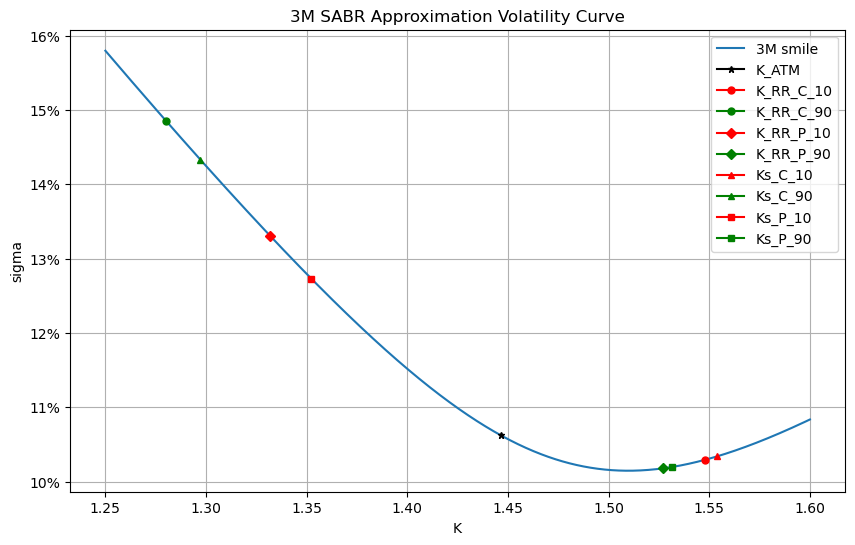

In [668]:
K_values_Q2 = np.linspace(1.25, 1.6, 1000)
markers = ['o','D','^','s']
plt.figure(figsize=(10, 6))

SABR_values = [SABR(F=F(deltat_arr[5]),s0=params_Q2[0],beta=params_Q2[1],
                     rho=params_Q2[2],v=params_Q2[3],K=K,T=deltat_arr[5]) 
               for K in K_values_Q2]
plt.plot(K_values_Q2, SABR_values, label=f"3M smile")
plt.plot(K_ATM_arr[5], SABR_sigma_K_ATM, color='black', markersize=5, marker='*', label='K_ATM')

for i in range(4):
    plt.plot(list(K_10.values())[i], SABR_sigma_K_10[i], color='red', markersize=5, marker=markers[i], label=list(K_10.keys())[i])
    plt.plot(list(K_90.values())[i], SABR_sigma_K_90[i], color='green', markersize=5, marker=markers[i], label=list(K_90.keys())[i])

def percentage(x, pos):
    return '{:.0f}%'.format(x * 100)

plt.xlabel("K")
plt.ylabel("sigma")
plt.legend()
plt.grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage))
plt.title("3M SABR Approximation Volatility Curve")

plt.show()

__Findings:__

For $\Delta = 0.1$, $K$ for calls are higher than $K_{ATM}$, while $K$ for puts are lower than $K_{ATM}$.

For $\Delta = 0.9$, $K$ for calls are lower than $K_{ATM}$, while $K$ for puts are higher than $K_{ATM}$.

### <span style="color:blue">Q3: List the implied volatility when the strike is equal to the forward rate, for all maturities in the table.</span>

In [611]:
F_arr = [F(deltat) for deltat in deltat_arr]

In [612]:
def SABR_special(F,s0,beta,rho,v,K,T):
    import numpy as np
    z = v/s0*(F*K)**((1-beta)/2)*np.log(F/K)
    x = np.log((np.sqrt(1-2*rho*z+z**2)+z-rho)/(1-rho))
    part1 = s0/(F*K)**((1-beta)/2)/(1+(1-beta)**2/24*((np.log(F/K))**2+(1-beta)**4/1920*(np.log(F/K))**4)**4)
    part2 = (1+((1-beta)**2/24*s0**2/(F*K)**(1-beta)
                +1/4*rho*beta*v*s0/(F*K)**((1-beta)/2)+(2-3*rho**2)*v**2/24)*T)
    sigma = part1 * part2 
    return sigma

In [613]:
SABR_sigma_F = [SABR_special(F=F_arr[i],s0=smile_params_arr[i][0][0],beta=smile_params_arr[i][0][1],
                             rho=smile_params_arr[i][0][2],v=smile_params_arr[i][0][3],K=F_arr[i],
                             T=deltat_arr[i]) for i in range(8)]

In [666]:
df_Q3 = pd.DataFrame({'$K(=F)$': F_arr, '$_{Imp}\sigma_{_{K=F}}$': SABR_sigma_F}, index=maturity_labels)
df_Q3

,$K(=F)$,$_{Imp}\sigma_{_{K=F}}$
ON,1.445040,0.109889
1W,1.445277,0.093971
2W,1.445594,0.086751
1M,1.446188,0.095399
2M,1.447496,0.101205
3M,1.448607,0.105902
6M,1.452263,0.114709
1Y,1.459522,0.121688


### <span style="color:blue">Q4: We want to use the event-weighting scheme to take into account weekend effects (ignore holidays and other events). Use the ATM-forward volatilities in Q3 to construct implied volatilities for every day (including weekend days) out to the 6-month maturity point (should be around 180 separate dates). Draw a graph of these volatilities as a function of option maturity. </span>

__Assumptions:__ (made by professor)

1. Volatilities are set to 0 on weekends. 

2. Function $q$ is piecewise flat.

3. Ignoring the smile. (In fact, here we only focus on a specific $K = F$, we do not need to consider multiple $K$ and therefore do not need to consider smile.)

In [615]:
day_arr = [getNaturalDays('2024-04-08',i) for i in maturity_arr[:-1]]
day_arr

[1, 7, 15, 30, 63, 91, 183]

$\omega$ is set by myself, as long as it is reasonable. And $q$ depends on $\omega$, so they are logically and computationally consistent for sure.

I set $\omega = 1$ for weekday, and $\omega = 0$ for weekend day.

In [616]:
from datetime import datetime
date = datetime.strptime('2024-04-08', '%Y-%m-%d')
weekday = date.strftime('%A')
print(weekday)

Monday


The start date '2024-04-08' is a Monday. So,

In [617]:
w_arr = []
while len(w_arr) < 183:
    w_arr.extend([1, 1, 1, 1, 1, 0, 0])
w_arr = w_arr[:183]

According to:

$$
\sigma(T_i)^2T_i - \sigma(T_{i-1})^2T_{i-1} = q_i^2 \int_{T_{i-1}}^{T_i} \omega(u)du
$$

$q_i$ applys to $(T_{i-1},T_i]$

In [626]:
q_values = []
for i in range(1,7):
    start = day_arr[i-1]
    end = day_arr[i]
    count = sum(w_arr[start:end])
    q = np.sqrt((SABR_sigma_F[i]**2*end - SABR_sigma_F[i-1]**2*start)/count)
    q_values.append(q)
q_values

[0.1115105595676396,
 0.0922611147065635,
 0.12065728325490108,
 0.12721916523625504,
 0.13698731999948646,
 0.1449857643229678]

According to:

$$
\sigma(T)^2 = \frac{1}{T}\int_{0}^{T} I(u)^2 du = \frac{1}{T} \int_{0}^{T} q(u)^2 \omega(u)du
$$

In [629]:
temp = [[q_values[i-1]]*(day_arr[i]-day_arr[i-1]) for i in range(1,7)]
q_arr = [SABR_sigma_F[0]]
for sublist in temp:
    q_arr.extend(sublist)

In [633]:
integrand = np.array(q_arr)**2*np.array(w_arr)

In [637]:
sigma_arr = np.sqrt(np.cumsum(integrand)/np.arange(1,len(integrand)+1))
sigma_arr

array([0.10988944, 0.11070297, 0.11097282, 0.1111075 , 0.11118823,
       0.1015005 , 0.0939712 , 0.09375915, 0.09359388, 0.09346146,
       0.09335298, 0.09326248, 0.08960369, 0.08634428, 0.08675129,
       0.08924859, 0.09139544, 0.09326227, 0.09490147, 0.09249852,
       0.09026931, 0.0918689 , 0.09330545, 0.09460313, 0.09578147,
       0.09685644, 0.09504588, 0.0933332 , 0.09440715, 0.0953986 ,
       0.09658883, 0.09769151, 0.09871614, 0.0972536 , 0.09585419,
       0.09686268, 0.09780708, 0.09869345, 0.09952706, 0.10031257,
       0.0990817 , 0.09789505, 0.09867603, 0.09941579, 0.10011756,
       0.10078425, 0.10141846, 0.10035646, 0.09932713, 0.09996127,
       0.10056678, 0.10114558, 0.10169942, 0.10222992, 0.10129629,
       0.10038779, 0.10092001, 0.10143123, 0.10192269, 0.10239552,
       0.10285078, 0.10201796, 0.10120506, 0.10186087, 0.1024925 ,
       0.10310129, 0.10368849, 0.10425526, 0.10349703, 0.10275511,
       0.10331603, 0.10385847, 0.10438335, 0.10489151, 0.10538

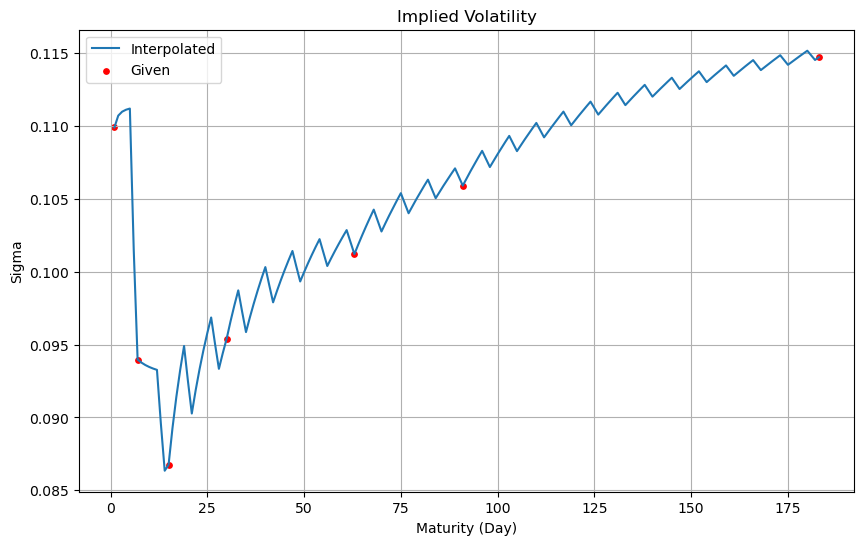

In [651]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 184), sigma_arr,label = 'Interpolated')
plt.scatter(day_arr, SABR_sigma_F[:-1], color='red', marker='o',label='Given',s=15)
plt.xlabel('Maturity (Day)')
plt.ylabel('Sigma')
plt.title('Implied Volatility')
plt.legend()
plt.grid()
plt.show()

### <center><span style="color:blue">END</span><center>